# Course DataViz : Comparation and Distribution Graphics

### 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Defining the color palette

In [2]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

### 3.Loading data 

In [3]:
data = pd.read_csv('/home/naina/Projects/Python/Cursos Alura/avançando_em_python/relatorio_vendas.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data_pedido          8940 non-null   object 
 1   data_envio           8940 non-null   object 
 2   modo_envio           8940 non-null   object 
 3   nome_cliente         8940 non-null   object 
 4   segmento_cliente     8940 non-null   object 
 5   cidade               8940 non-null   object 
 6   estado               8940 non-null   object 
 7   regiao               8940 non-null   object 
 8   departamento         8940 non-null   object 
 9   tipo_produto         8940 non-null   object 
 10  preco_base           8940 non-null   float64
 11  preco_unit_sem_desc  8940 non-null   float64
 12  desconto             8940 non-null   float64
 13  preco_unit_venda     8940 non-null   float64
 14  quantidade           8940 non-null   int64  
 15  vendas               8940 non-null   f

### 4. Convert date columns to datetime format

In [5]:
data["data_pedido"] = pd.to_datetime(data["data_pedido"], format="%Y-%m-%d")
data["data_envio"] = pd.to_datetime(data["data_envio"], format="%Y-%m-%d")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

### 5. Creating a dataframe copy to preserve the original dataframe

In [7]:
data_year = data.copy()


### 6. Redefining the dataframe by columns of interest

In [8]:
data_year = data_year[['data_pedido', 'vendas']]
data_year['year'] = data_year['data_pedido'].dt.year
data_year.drop(columns='data_pedido', inplace=True)
data_year = data_year.groupby('year').aggregate('sum')

### 7. Ploting Graphics

In [29]:
def plotting_sales(cores):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.set_theme(style='white')
    sns.barplot(data=data_year, x=data_year.index, y='vendas', palette=[cores])
    ax.set_title('Sales per year - 2016 to 2019', loc='left', fontsize=18, color=CINZA1)
    ax.set_xlabel('')
    ax.xaxis.set_tick_params(labelsize=14, color=CINZA2)
    ax.set_ylabel('')
    sns.despine(left=True, bottom=True)
    ax.set_yticklabels([])
    for i, valor in enumerate(data_year["vendas"]):
        qtd = f'R$ {valor:,.0f}'.replace(",",".")
        offset = 1e5
        ax.text(i, valor + offset, qtd, color = CINZA2, fontsize =12, ha = "center", va = "center")
plt.show()

/tmp/ipykernel_9905/2081940591.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_year, x=data_year.index, y='vendas', palette=[cores])
/tmp/ipykernel_9905/2081940591.py:4: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=data_year, x=data_year.index, y='vendas', palette=[cores])


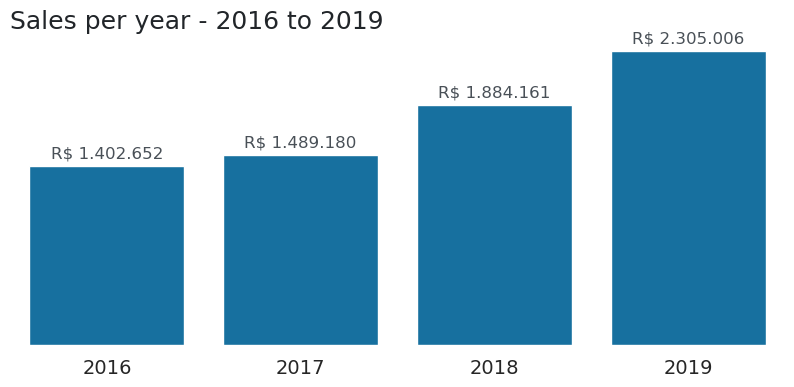

In [30]:
plotting_sales(AZUL2)

In [33]:
cores = []
for ano in data_year.index:
  if data_year.loc[ano,"vendas"] == data_year["vendas"].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

/tmp/ipykernel_9905/2081940591.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_year, x=data_year.index, y='vendas', palette=[cores])
/tmp/ipykernel_9905/2081940591.py:4: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=data_year, x=data_year.index, y='vendas', palette=[cores])


ValueError: Invalid RGBA argument: ['#CDDBF3', '#CDDBF3', '#CDDBF3', '#0077b6']

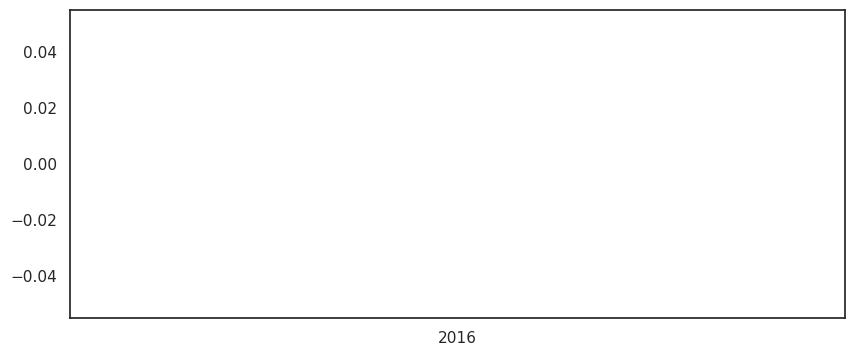

In [35]:
ax = plotting_sales(cores)

In [15]:
# Anotando uma conclusão no gráfico
ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

AttributeError: 'NoneType' object has no attribute 'text'